# Time Series:

# Exponential Smoothing Technique:

### Importing libraries:

In [815]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

# Reading and Understanding Data:

In [816]:
df_air = pd.read_csv('airline-passenger-traffic.csv',header=None)

In [817]:
df_air.columns = ['Months','Passengers']

In [818]:
df_air.head()

,Months,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [819]:
df_air.shape

(144, 2)

In [820]:
df_air.describe()

,Passengers
count,140.000000
mean,280.735714
std,120.593235
min,104.000000
25%,180.000000
50%,268.000000
75%,360.500000
max,622.000000


In [821]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Months      144 non-null    object 
 1   Passengers  140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [822]:
df_air.dtypes

Months         object
Passengers    float64
dtype: object

#### Converting into DateTime Series:

In [823]:
df_air['Months'] = pd.to_datetime(df_air['Months'],format='%Y-%m')

In [824]:
df_air = df_air.set_index('Months')

In [825]:
df_air.head()

,Passengers
Months,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


### Time Series Analysis:

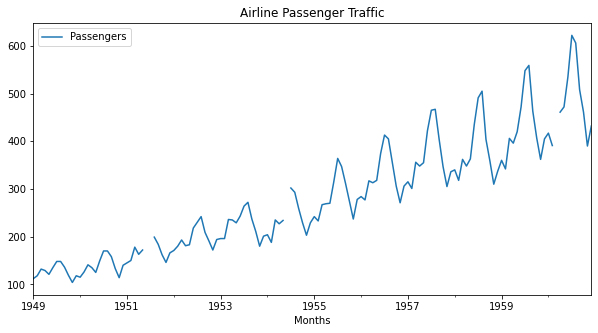

In [826]:
# plottig time series data:

df_air.plot(figsize=(10,5))
plt.title('Airline Passenger Traffic')
plt.show()

### Observation :-
- Here in plot some data are missing.

###  Missing Value Treatment:
- 1.Mean Imputation
- 2.Linear Interpolation
- 3.Using Last Observation carried forward

In [827]:
# 1. Mean imputation
df_air_mean = pd.read_csv('airline-passenger-traffic.csv')
df_air_mean.columns = ['Months','Passengers']
df_air_mean['Months'] = df_air_mean['Months'].astype('datetime64[ns]')
df_air_mean.set_index('Months',inplace=True)

In [828]:
df_air_mean['Passengers'].fillna(df_air_mean['Passengers'].mean(),inplace=True)

In [829]:
df_air_mean.isnull().sum()

Passengers    0
dtype: int64

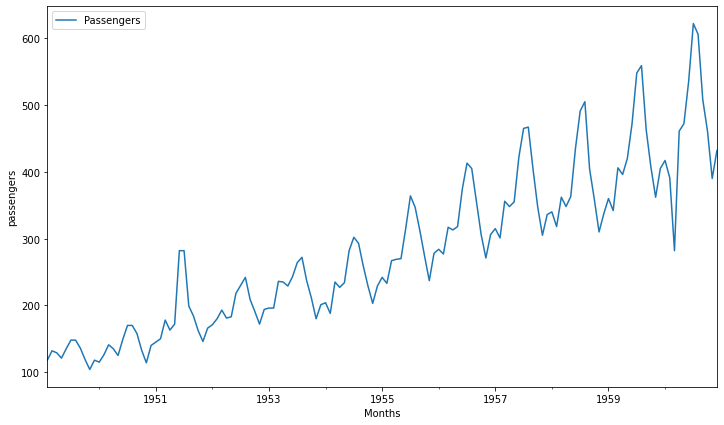

In [830]:
# Plot the graph
df_air_mean.plot(figsize=(12,7))
plt.xlabel('Months')
plt.ylabel('passengers')
plt.show()

In [831]:
# 2. Using Linear interpolation
df_air['Passengers'].fillna(df_air['Passengers'].interpolate(method='linear'),inplace=True)

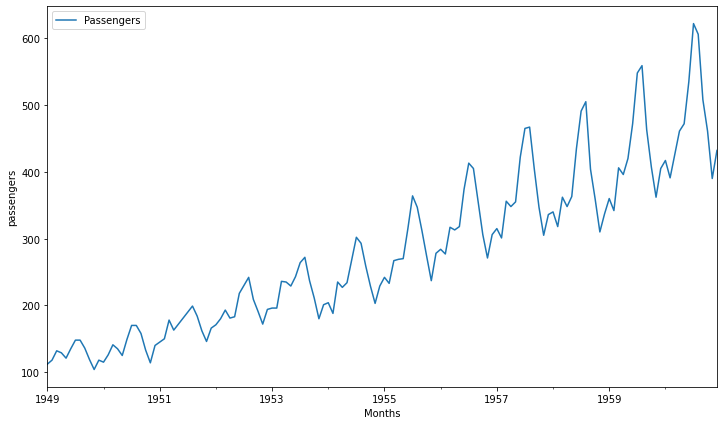

In [832]:
# Plot the graph
df_air.plot(figsize=(12,7))
plt.xlabel('Months')
plt.ylabel('passengers')
plt.show()

In [833]:
# 3. Using Last Observation carried forward
df_air_last = pd.read_csv('airline-passenger-traffic.csv')
df_air_last.columns = ['Months','Passengers']
df_air_last['Months'] = df_air_last['Months'].astype('datetime64[ns]')
df_air_last.set_index('Months',inplace=True)

In [834]:
# Here in method we use pad, ffill, bfill
df_air_last['Passengers'].fillna(method = 'pad',inplace=True)

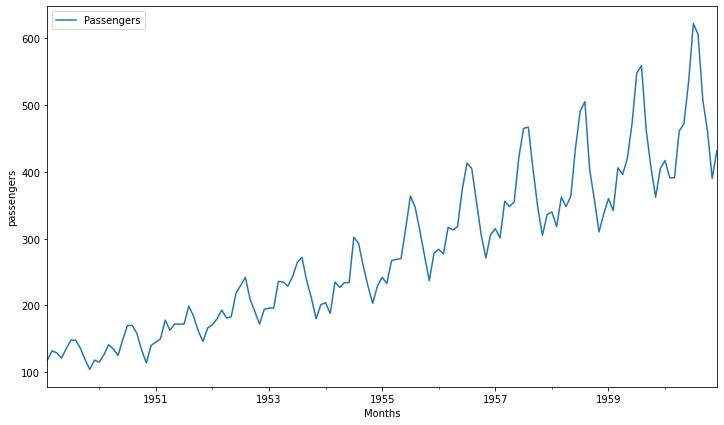

In [835]:
# Plot the graph
df_air_last.plot(figsize=(12,7))
plt.xlabel('Months')
plt.ylabel('passengers')
plt.show()

### Observation :-
- Here we use LInear interpolation for missing value treatment bcz here in data trend is present.

# Handling Outliers

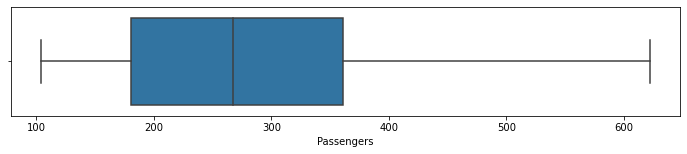

In [836]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df_air['Passengers'], whis=1.5)

<AxesSubplot:>

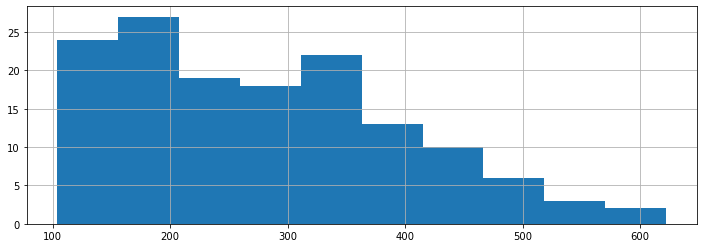

In [837]:
# Histogram plot

df_air['Passengers'].hist(figsize=(12,4))

# Time Series Decomposition 

### Additive decomposition

In [838]:
from statsmodels.api import tsa

<Figure size 864x576 with 0 Axes>

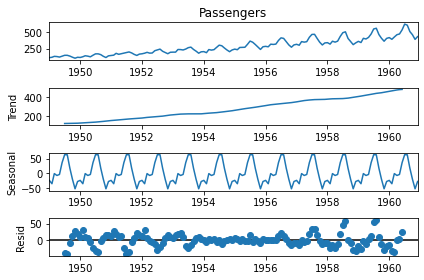

In [839]:
plt.figure(figsize=(12,8))
decomposiotion_add = tsa.seasonal_decompose(df_air.Passengers , model='additive') # additive seasonal index
decomposiotion_add.plot()
plt.show()

### Multiplicative Seasonal Decomposition

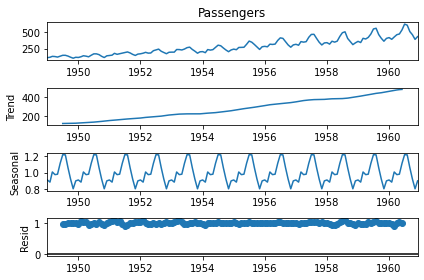

In [840]:
decomposiotion_mul = tsa.seasonal_decompose(df_air.Passengers , model='multiplicative') # multiplicative seasonal index
decomposiotion_mul.plot()
plt.show()

### Observation :-
- From Residual we can say that the series is Multiplicative.
- Here in series Trens is present.

# Augmented Dickey-Fuller (ADF) test :-

In [841]:
from statsmodels.tsa.stattools import adfuller

In [842]:
adf_test = adfuller(df_air['Passengers'])

In [843]:
print('ADF Statistic : %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic : 0.894609
p-value: 0.993020


### Observation :-
- p-value is < 0.05 then the series is non Stationary

#  Kwiatkowski Phillips Schmidt Shin (KPSS) test :- 

In [844]:
from statsmodels.tsa.stattools import kpss

In [845]:
kpss_test = kpss(df_air['Passengers'])

In [846]:
print('KPSS Statistic : %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])

KPSS Statistic : 1.052050
p-value: 0.010000


### Observation :-
- p-value is < 0.05 then the series is non Stationary

In [847]:
# To make Series Stationary:-

## Box Cox Transformation

In [848]:
from scipy.stats import boxcox

- box cox transformation to make variance constant --> as series is multiplicative

In [849]:
# boxcox transformation
df_air['boxcox'] = boxcox(df_air['Passengers'],lmbda=0)

In [850]:
df_air.index = df_air.index

In [851]:
df_air.head()

,Passengers,boxcox
Months,,
1949-01-01,112.0,4.718499
1949-02-01,118.0,4.770685
1949-03-01,132.0,4.882802
1949-04-01,129.0,4.859812
1949-05-01,121.0,4.795791


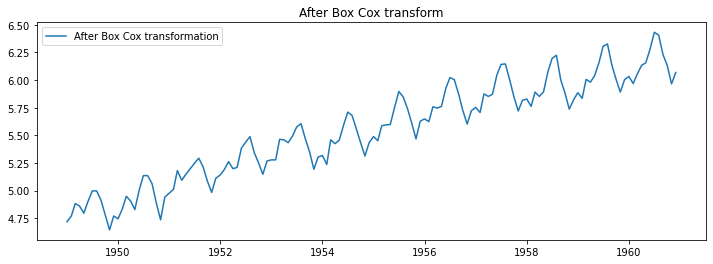

In [852]:
plt.figure(figsize=(12,4))
plt.plot(df_air['boxcox'],label = 'After Box Cox transformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

In [853]:
# checking for stationary on transformed series
adf_test = adfuller(df_air['boxcox'])

In [854]:
print('p-value: %f' % adf_test[1])

p-value: 0.428029


#### Observation :-
- series is not stationay.

## Differencing

In [855]:
df_air['boxcox_diff'] = df_air['boxcox']-df_air['boxcox'].shift()

In [856]:
df_air.head()

,Passengers,boxcox,boxcox_diff
Months,,,
1949-01-01,112.0,4.718499,NaN
1949-02-01,118.0,4.770685,0.052186
1949-03-01,132.0,4.882802,0.112117
1949-04-01,129.0,4.859812,-0.022990
1949-05-01,121.0,4.795791,-0.064022


In [857]:
# dropping the null value
df_air.dropna(inplace=True)

In [858]:
df_air.head()

,Passengers,boxcox,boxcox_diff
Months,,,
1949-02-01,118.0,4.770685,0.052186
1949-03-01,132.0,4.882802,0.112117
1949-04-01,129.0,4.859812,-0.022990
1949-05-01,121.0,4.795791,-0.064022
1949-06-01,135.0,4.905275,0.109484


In [859]:
# check for stationary on transformed and differenced series
adf_test = adfuller(df_air['boxcox_diff'])

In [860]:
print('p-value: %f' % adf_test[1])

p-value: 0.015326


#### Observation :-
- p value < 0.05 series is stationary.

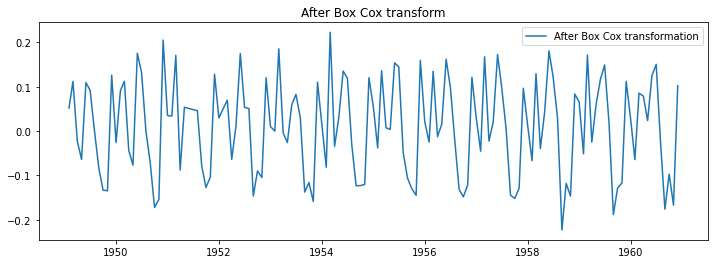

In [861]:
plt.figure(figsize=(12,4))
plt.plot(df_air['boxcox_diff'],label = 'After Box Cox transformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

# Autocorrelation function (ACF)

In [862]:
from statsmodels.graphics.tsaplots import plot_acf

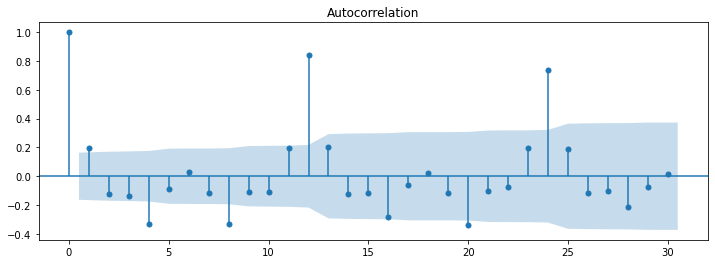

In [863]:
plt.figure(figsize=(12,4))
plot_acf(df_air['boxcox_diff'],ax=plt.gca(),lags=30)
plt.show()

# Partial autocorrelation function (PACF)

In [864]:
from statsmodels.graphics.tsaplots import plot_pacf

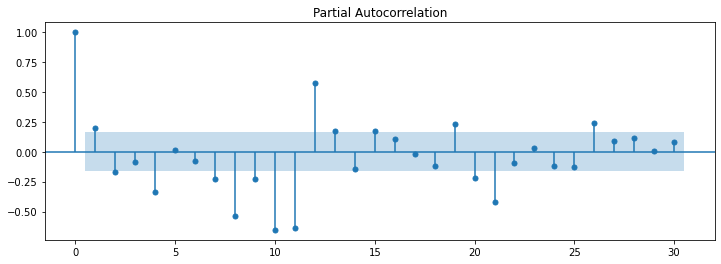

In [865]:
plt.figure(figsize=(12,4))
plot_pacf(df_air['boxcox_diff'],ax=plt.gca(),lags=30)
plt.show()

### Split data into training and test set 

In [866]:
train_len = 120
train = df_air['boxcox_diff'][0:train_len] # frist 120 months as training set
test = df_air['boxcox_diff'][train_len:] # remaining 24 months as test set

In [867]:
train

Months
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1958-09-01   -0.223144
1958-10-01   -0.118092
1958-11-01   -0.146750
1958-12-01    0.083511
1959-01-01    0.066021
Name: boxcox_diff, Length: 120, dtype: float64

In [868]:
test

Months
1959-02-01   -0.051293
1959-03-01    0.171542
1959-04-01   -0.024939
1959-05-01    0.058841
1959-06-01    0.116724
1959-07-01    0.149296
1959-08-01    0.019874
1959-09-01   -0.188422
1959-10-01   -0.128914
1959-11-01   -0.117169
1959-12-01    0.112243
1960-01-01    0.029199
1960-02-01   -0.064379
1960-03-01    0.085732
1960-04-01    0.078959
1960-05-01    0.023581
1960-06-01    0.125288
1960-07-01    0.150673
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: boxcox_diff, dtype: float64

# Auto regression method (AR)

In [869]:
from statsmodels.tsa.arima_model import ARIMA

In [870]:
model_ar = ARIMA(train,order=(1,0,0)) # 1 for AR , 0 for I , 0 for MA

In [871]:
model_ar = model_ar.fit()

In [872]:
print(model_ar.params)

const                0.009917
ar.L1.boxcox_diff    0.185546
dtype: float64


In [873]:
y_pred_ar = model_ar.predict(test.index.min(),test.index.max())

In [874]:
y_pred_ar

1959-02-01    0.020327
1959-03-01    0.011848
1959-04-01    0.010275
1959-05-01    0.009983
1959-06-01    0.009929
1959-07-01    0.009919
1959-08-01    0.009917
1959-09-01    0.009917
1959-10-01    0.009917
1959-11-01    0.009917
1959-12-01    0.009917
1960-01-01    0.009917
1960-02-01    0.009917
1960-03-01    0.009917
1960-04-01    0.009917
1960-05-01    0.009917
1960-06-01    0.009917
1960-07-01    0.009917
1960-08-01    0.009917
1960-09-01    0.009917
1960-10-01    0.009917
1960-11-01    0.009917
1960-12-01    0.009917
Freq: MS, dtype: float64

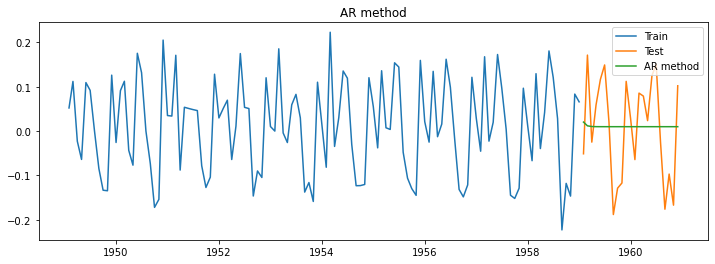

In [875]:
# Plot train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(y_pred_ar,label='AR method')
plt.legend(loc='best')
plt.title('AR method')
plt.show()

#### Calculate RMSE and MAPE

In [876]:
from sklearn.metrics import mean_squared_error

In [877]:
rmse = np.sqrt(mean_squared_error(test,y_pred_ar)).round(2)
print('RMSE :',rmse)

RMSE : 0.11


In [878]:
mape = np.round(np.mean(np.abs(test-y_pred_ar)/test)*100,2)
print('MAPE :',mape)

MAPE : -4.33


# Moving Average method (MA)

In [879]:
model_ma = ARIMA(train,order=(0,0,1)) # 0 for AR , 0 for I , 1 for MA

In [880]:
model_ma = model_ma.fit()

In [881]:
print(model_ma.params)

const                0.009821
ma.L1.boxcox_diff    0.270519
dtype: float64


In [882]:
y_pred_ma = model_ma.predict(test.index.min(),test.index.max())

In [883]:
y_pred_ma

1959-02-01    0.016879
1959-03-01    0.009821
1959-04-01    0.009821
1959-05-01    0.009821
1959-06-01    0.009821
1959-07-01    0.009821
1959-08-01    0.009821
1959-09-01    0.009821
1959-10-01    0.009821
1959-11-01    0.009821
1959-12-01    0.009821
1960-01-01    0.009821
1960-02-01    0.009821
1960-03-01    0.009821
1960-04-01    0.009821
1960-05-01    0.009821
1960-06-01    0.009821
1960-07-01    0.009821
1960-08-01    0.009821
1960-09-01    0.009821
1960-10-01    0.009821
1960-11-01    0.009821
1960-12-01    0.009821
Freq: MS, dtype: float64

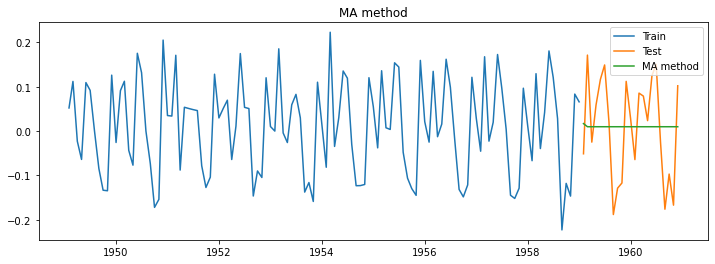

In [884]:
# Plot train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(y_pred_ma,label='MA method')
plt.legend(loc='best')
plt.title('MA method')
plt.show()

#### Calculate RMSE and MAPE

In [885]:
rmse = np.sqrt(mean_squared_error(test,y_pred_ma)).round(2)
mape = np.round(np.mean(np.abs(test-y_pred_ma)/test)*100,2)
print('RMSE :',rmse)
print('MAPE :',mape)

RMSE : 0.11
MAPE : -3.77


# Auto regressive Moving average model (ARMA)

In [886]:
model_ar_ma = ARIMA(train,order=(1,0,1)) # 0 for AR , 0 for I , 1 for MA

In [887]:
model_ar_ma = model_ar_ma.fit()

In [888]:
print(model_ar_ma.params)

const                0.009583
ar.L1.boxcox_diff   -0.527564
ma.L1.boxcox_diff    0.798209
dtype: float64


In [889]:
y_pred_arma = model_ar_ma.predict(test.index.min(),test.index.max())

In [890]:
y_pred_arma

1959-02-01   -0.023402
1959-03-01    0.026985
1959-04-01    0.000403
1959-05-01    0.014426
1959-06-01    0.007028
1959-07-01    0.010931
1959-08-01    0.008872
1959-09-01    0.009958
1959-10-01    0.009385
1959-11-01    0.009688
1959-12-01    0.009528
1960-01-01    0.009612
1960-02-01    0.009568
1960-03-01    0.009591
1960-04-01    0.009579
1960-05-01    0.009585
1960-06-01    0.009582
1960-07-01    0.009584
1960-08-01    0.009583
1960-09-01    0.009583
1960-10-01    0.009583
1960-11-01    0.009583
1960-12-01    0.009583
Freq: MS, dtype: float64

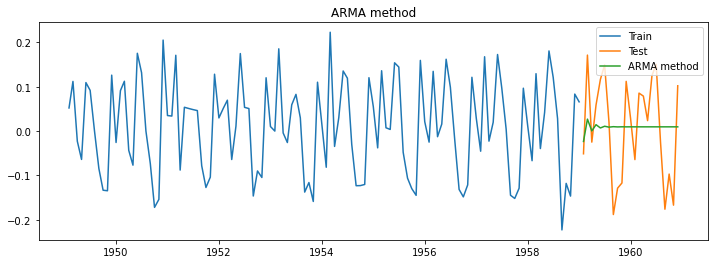

In [891]:
# Plot train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(y_pred_arma,label='ARMA method')
plt.legend(loc='best')
plt.title('ARMA method')
plt.show()

#### Calculate RMSE and MAPE

In [892]:
rmse = np.sqrt(mean_squared_error(test,y_pred_arma)).round(2)
mape = np.round(np.mean(np.abs(test-y_pred_arma)/test)*100,2)
print('RMSE :',rmse)
print('MAPE :',mape)

RMSE : 0.11
MAPE : 1.02


# Autoregressive Integrated Moving Average (ARIMA)

In [893]:
model_arima = ARIMA(train,order=(1,1,1)) # 0 for AR , 0 for I , 1 for MA

In [894]:
model_arima = model_arima.fit()

In [895]:
print(model_arima.params)

const                 -0.000108
ar.L1.D.boxcox_diff    0.194304
ma.L1.D.boxcox_diff   -0.999973
dtype: float64


In [896]:
y_pred_arima = model_arima.predict(test.index.min(),test.index.max())

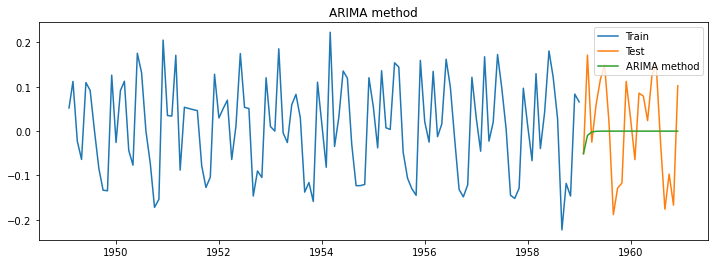

In [897]:
# Plot train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(y_pred_arima,label='ARIMA method')
plt.legend(loc='best')
plt.title('ARIMA method')
plt.show()

#### Calculate RMSE and MAPE

In [898]:
rmse = np.sqrt(mean_squared_error(test,y_pred_arima)).round(2)
mape = np.round(np.mean(np.abs(test-y_pred_arima)/test)*100,2)
print('RMSE :',rmse)
print('MAPE :',mape)

RMSE : 0.11
MAPE : 18.14


# SARIMA:

In [899]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [900]:
model_sarima = SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12))

In [901]:
model_sarima = model_sarima.fit()

In [902]:
print(model_sarima.params)

ar.L1      -0.248535
ma.L1      -0.978860
ar.S.L12   -0.063113
ma.S.L12   -0.492391
sigma2      0.001470
dtype: float64


In [903]:
y_pred_sarima = model_sarima.predict(test.index.min(),test.index.max())

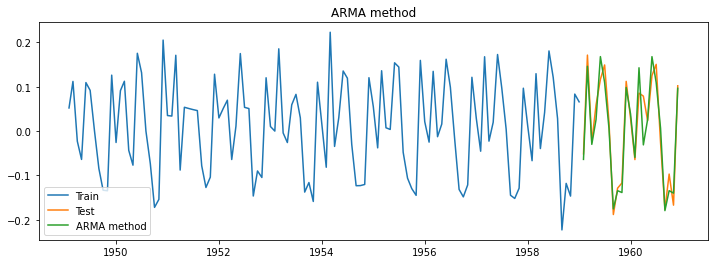

In [904]:
# Plot train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(y_pred_sarima,label='ARMA method')
plt.legend(loc='best')
plt.title('ARMA method')
plt.show()

#### Calculate RMSE and MAPE

In [905]:
rmse = np.sqrt(mean_squared_error(test,y_pred_sarima)).round(2)
mape = np.round(np.mean(np.abs(test-y_pred_sarima)/test)*100,2)
print('RMSE :',rmse)
print('MAPE :',mape)

RMSE : 0.04
MAPE : 11.98
